# Problem Statement

### Task 1:-Prepare a complete data analysis report on the given data.

### Task 2:-Create a predictive model which will help the bank to identify which customer will make transactions in future.

### Identify which customers will make a specific transaction in the future, irrespective of the amount of money transacted.

### Note: You can skip EDA part in this project as feature names are not provided.

## Importing Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("C:/Capstone Projects/train(1).csv")

## Basic checks

In [3]:
df

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,train_199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,train_199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001


In [4]:
df.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [5]:
df.tail()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,train_199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,train_199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001
199999,train_199999,0,10.8762,-5.7105,12.1183,8.0328,11.5577,0.3488,5.2839,15.2058,...,8.9842,1.6893,0.1276,0.3766,15.2101,-2.4907,-2.2342,8.1857,12.1284,0.1385


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [7]:
df.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [8]:
pd.set_option('display.max_columns', None)
df

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,4.6667,3.8743,-5.2387,7.3746,11.5767,12.0446,11.6418,-7.0170,5.9226,-14.2136,16.0283,5.3253,12.9194,29.0460,-0.6940,5.1736,-0.7474,14.8322,11.2668,5.3822,2.0183,10.1166,16.1828,4.9590,2.0771,-0.2154,8.6748,9.5319,5.8056,22.4321,5.0109,-4.7010,21.6374,0.5663,5.1999,8.8600,43.1127,18.3816,-2.3440,23.4104,6.5199,12.1983,13.6468,13.8372,1.3675,2.9423,-4.5213,21.4669,9.3225,16.4597,7.9984,-1.7069,-21.4494,6.7806,11.0924,9.9913,14.8421,0.1812,8.9642,16.2572,2.1743,-3.4132,9.4763,13.3102,26.5376,1.4403,14.7100,6.0454,9.5426,17.1554,14.1104,24.3627,2.0323,6.7602,3.9141,-0.4851,2.5240,1.5093,2.5516,15.5752,-13.4221,7.2739,16.0094,9.7268,0.8897,0.7754,4.2218,12.0039,13.8571,-0.7338,-1.9245,15.4462,12.8287,0.3587,9.6508,6.5674,5.1726,3.1345,29.4547,31.4045,2.8279,15.6599,8.3307,-5.6011,19.0614,11.2663,8.6989,8.3694,11.5659,-16.4727,4.0288,17.9244,18.5177,10.7800,9.0056,16.6964,10.4838,1.6573,12.1749,-13.1324,17.6054,11.5423,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,10.8160,3.6783,-11.1147,1.8730,9.8775,11.7842,1.2444,-47.3797,7.3718,0.1948,34.4014,25.7037,11.8343,13.2256,-4.1083,6.6885,-8.0946,18.5995,19.3219,7.0118,1.9210,8.8682,8.0109,-7.2417,1.7944,-1.3147,8.1042,1.5365,5.4007,7.9344,5.0220,2.2302,40.5632,0.5134,3.1701,20.1068,7.7841,7.0529,3.2709,23.4822,5.5075,13.7814,2.5462,18.1782,0.3683,-4.8210,-5.4850,13.7867,-13.5901,11.0993,7.9022,12.2301,0.4768,6.8852,8.0905,10.9631,11.7569,-1.2722,24.7876,26.6881,1.8944,0.6939,-13.6950,8.4068,35.4734,1.7093,15.1866,2.6227,7.3412,32.0888,13.9550,13.0858,6.6203,7.1051,5.3523,8.5426,3.6159,4.1569,3.0454,7.8522,-11.5100,7.5109,31.5899,9.5018,8.2736,10.1633,0.1225,12.5942,14.5697

In [9]:
df.isnull().sum()

ID_code    0
target     0
var_0      0
var_1      0
var_2      0
          ..
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 202, dtype: int64

There are no null values present in the dataset.

In [10]:
df.duplicated().sum()

0

There are no duplicated values present in this data.

In [11]:
df["target"].value_counts()

0    179902
1     20098
Name: target, dtype: int64

#### This data has 200000 rows and 202 columns without a Specific column names and also mentioned as we can skip EDA part in this project as feature names are not provided, because of this Skipping the EDA Part and the Domain Analysis part because these parts cannot be performed without the Feature names.

## Data preprocessing

In [12]:
df1=df.copy()

In [13]:
df1.drop("ID_code",axis=1,inplace=True)
df1

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,4.6667,3.8743,-5.2387,7.3746,11.5767,12.0446,11.6418,-7.0170,5.9226,-14.2136,16.0283,5.3253,12.9194,29.0460,-0.6940,5.1736,-0.7474,14.8322,11.2668,5.3822,2.0183,10.1166,16.1828,4.9590,2.0771,-0.2154,8.6748,9.5319,5.8056,22.4321,5.0109,-4.7010,21.6374,0.5663,5.1999,8.8600,43.1127,18.3816,-2.3440,23.4104,6.5199,12.1983,13.6468,13.8372,1.3675,2.9423,-4.5213,21.4669,9.3225,16.4597,7.9984,-1.7069,-21.4494,6.7806,11.0924,9.9913,14.8421,0.1812,8.9642,16.2572,2.1743,-3.4132,9.4763,13.3102,26.5376,1.4403,14.7100,6.0454,9.5426,17.1554,14.1104,24.3627,2.0323,6.7602,3.9141,-0.4851,2.5240,1.5093,2.5516,15.5752,-13.4221,7.2739,16.0094,9.7268,0.8897,0.7754,4.2218,12.0039,13.8571,-0.7338,-1.9245,15.4462,12.8287,0.3587,9.6508,6.5674,5.1726,3.1345,29.4547,31.4045,2.8279,15.6599,8.3307,-5.6011,19.0614,11.2663,8.6989,8.3694,11.5659,-16.4727,4.0288,17.9244,18.5177,10.7800,9.0056,16.6964,10.4838,1.6573,12.1749,-13.1324,17.6054,11.5423,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,10.8160,3.6783,-11.1147,1.8730,9.8775,11.7842,1.2444,-47.3797,7.3718,0.1948,34.4014,25.7037,11.8343,13.2256,-4.1083,6.6885,-8.0946,18.5995,19.3219,7.0118,1.9210,8.8682,8.0109,-7.2417,1.7944,-1.3147,8.1042,1.5365,5.4007,7.9344,5.0220,2.2302,40.5632,0.5134,3.1701,20.1068,7.7841,7.0529,3.2709,23.4822,5.5075,13.7814,2.5462,18.1782,0.3683,-4.8210,-5.4850,13.7867,-13.5901,11.0993,7.9022,12.2301,0.4768,6.8852,8.0905,10.9631,11.7569,-1.2722,24.7876,26.6881,1.8944,0.6939,-13.6950,8.4068,35.4734,1.7093,15.1866,2.6227,7.3412,32.0888,13.9550,13.0858,6.6203,7.1051,5.3523,8.5426,3.6159,4.1569,3.0454,7.8522,-11.5100,7.5109,31.5899,9.5018,8.2736,10.1633,0.1225,12.5942,14.5697,2.4354,0.8194,16.5346,1

Dropping the column ID_code from the dataset because that column does not have any useful Information.

## Checking for Outliers:

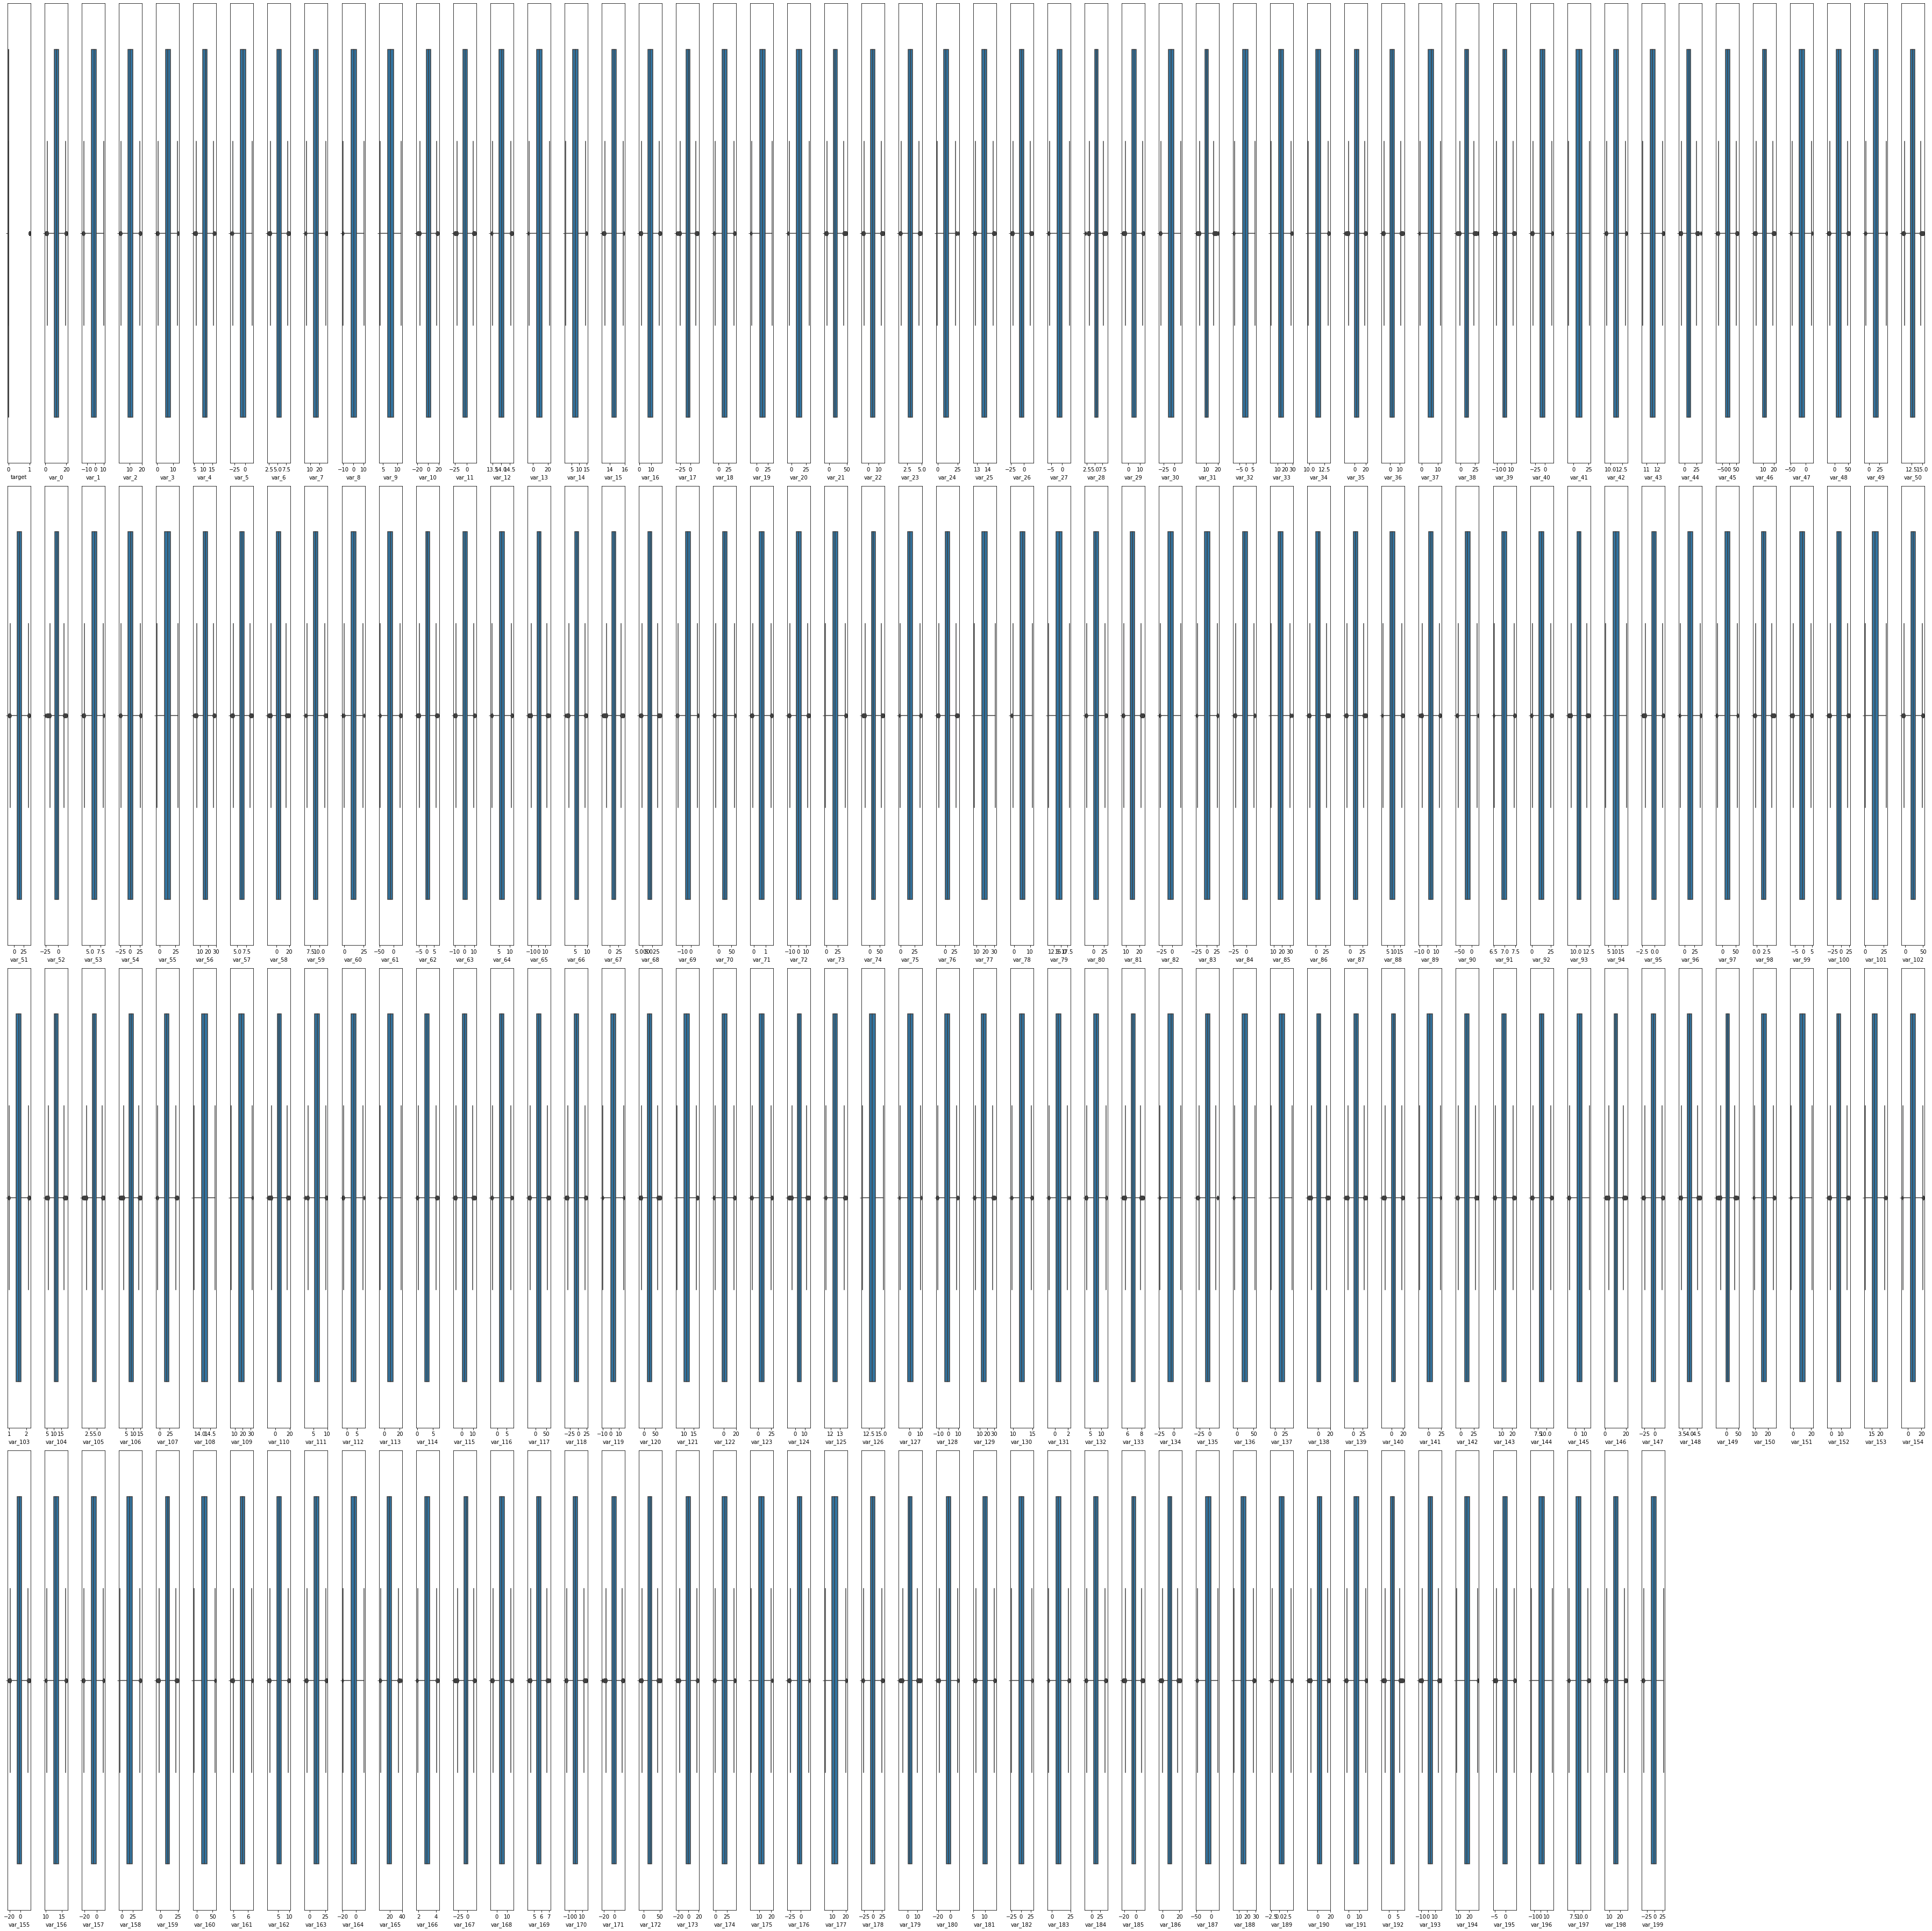

In [14]:
plt.figure(figsize=(50,50))
i=1
for column in df1:
    plt.subplot(4,52,i)
    sns.boxplot(x=df1[column],data=df1)
    i=i+1
plt.tight_layout()

In [15]:
## using IQR to remove the outliers
from scipy import stats
IQR = stats.iqr(df1.var_0, interpolation = 'midpoint') 

IQR

4.304399999999999

In [16]:
## min and max limit calculation

# First quartile (Q1) 
Q1 = df1.var_0.quantile(0.25)

# Third quartile (Q3) 
Q3 =df1.var_0.quantile(0.75)

##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [17]:
len(df1.loc[df1['var_0']>max_limit])/len(df1)

0.000295

In [18]:
len(df1.loc[df1['var_0']<min_limit])/len(df1)

0.000225

In [19]:
import pandas as pd

# Assuming df is your DataFrame

# Set the threshold for outlier detection (you can adjust this as needed)
outlier_threshold = 1.5

# Set the number of data points (n) for which you want to check the outlier percentage
n = 200000  # Change this to your desired value

# Create an empty dictionary to store the outlier percentages
outlier_percentages = {}

# Iterate through each column in the DataFrame
for i in range(202):  # Assuming you have columns named var_0 to var_201
    column_name = f'var_{i}'
    if column_name in df1.columns:
        # Check for outliers using IQR method for the first n data points
        Q1 = df1[column_name].head(n).quantile(0.25)
        Q3 = df1[column_name].head(n).quantile(0.75)
        IQR = Q3 - Q1
        min_limit = Q1 - outlier_threshold * IQR
        max_limit = Q3 + outlier_threshold * IQR

        # Count the number of outliers
        num_outliers = ((df1[column_name].head(n) < min_limit) | (df1[column_name].head(n) > max_limit)).sum()

        # Calculate the percentage of outliers
        percentage_outliers = (num_outliers / n) * 100

        # Store the result in the dictionary
        outlier_percentages[column_name] = percentage_outliers

# Print the total outlier percentages for each column
for column, percentage in outlier_percentages.items():
    print(f"Column '{column}': {percentage:.2f}% outliers in the first {n} data points")

Column 'var_0': 0.05% outliers in the first 200000 data points
Column 'var_1': 0.00% outliers in the first 200000 data points
Column 'var_2': 0.02% outliers in the first 200000 data points
Column 'var_3': 0.01% outliers in the first 200000 data points
Column 'var_4': 0.04% outliers in the first 200000 data points
Column 'var_5': 0.00% outliers in the first 200000 data points
Column 'var_6': 0.06% outliers in the first 200000 data points
Column 'var_7': 0.01% outliers in the first 200000 data points
Column 'var_8': 0.00% outliers in the first 200000 data points
Column 'var_9': 0.00% outliers in the first 200000 data points
Column 'var_10': 0.06% outliers in the first 200000 data points
Column 'var_11': 0.15% outliers in the first 200000 data points
Column 'var_12': 0.02% outliers in the first 200000 data points
Column 'var_13': 0.00% outliers in the first 200000 data points
Column 'var_14': 0.00% outliers in the first 200000 data points
Column 'var_15': 0.01% outliers in the first 20000

Here we have the total number of outlier Percentage for each of the columns, now we need to replace the Outlier values for the columns having the outlier Percentage having less than 5%.

In [20]:
import pandas as pd

# Assuming df is your DataFrame

# Set the threshold for outlier detection (you can adjust this as needed)
outlier_threshold = 1.5

# Set the number of data points (n) for which you want to check and replace outliers
n =200000   # Change this to your desired value

# Iterate through each column in the DataFrame
for i in range(202):  # Assuming you have columns named var_0 to var_201
    column_name = f'var_{i}'
    if column_name in df1.columns:
        # Check for outliers using IQR method for the first n data points
        Q1 = df1[column_name].head(n).quantile(0.25)
        Q3 = df1[column_name].head(n).quantile(0.75)
        IQR = Q3 - Q1
        min_limit = Q1 - outlier_threshold * IQR
        max_limit = Q3 + outlier_threshold * IQR

        # Replace outliers with the mean value
        df1[column_name] = df1[column_name].where((df1[column_name] >= min_limit) & (df1[column_name] <= max_limit), df1[column_name].median())

# Now, df contains the original DataFrame with outliers replaced by the mean for each column

Here most of the Outliers column has been replaced with the median values

In [21]:
import pandas as pd

# Assuming df is your DataFrame

# Set the threshold for outlier detection (you can adjust this as needed)
outlier_threshold = 1.5

# Set the number of data points (n) for which you want to check the outlier percentage
n = 200000  # Change this to your desired value

# Create an empty dictionary to store the outlier percentages
outlier_percentages = {}

# Iterate through each column in the DataFrame
for i in range(202):  # Assuming you have columns named var_0 to var_201
    column_name = f'var_{i}'
    if column_name in df1.columns:
        # Check for outliers using IQR method for the first n data points
        Q1 = df1[column_name].head(n).quantile(0.25)
        Q3 = df1[column_name].head(n).quantile(0.75)
        IQR = Q3 - Q1
        min_limit = Q1 - outlier_threshold * IQR
        max_limit = Q3 + outlier_threshold * IQR

        # Count the number of outliers
        num_outliers = ((df1[column_name].head(n) < min_limit) | (df1[column_name].head(n) > max_limit)).sum()

        # Calculate the percentage of outliers
        percentage_outliers = (num_outliers / n) * 100

        # Store the result in the dictionary
        outlier_percentages[column_name] = percentage_outliers

# Print the total outlier percentages for each column
for column, percentage in outlier_percentages.items():
    print(f"Column '{column}': {percentage:.2f}% outliers in the first {n} data points")

Column 'var_0': 0.00% outliers in the first 200000 data points
Column 'var_1': 0.00% outliers in the first 200000 data points
Column 'var_2': 0.00% outliers in the first 200000 data points
Column 'var_3': 0.00% outliers in the first 200000 data points
Column 'var_4': 0.00% outliers in the first 200000 data points
Column 'var_5': 0.00% outliers in the first 200000 data points
Column 'var_6': 0.00% outliers in the first 200000 data points
Column 'var_7': 0.00% outliers in the first 200000 data points
Column 'var_8': 0.00% outliers in the first 200000 data points
Column 'var_9': 0.00% outliers in the first 200000 data points
Column 'var_10': 0.00% outliers in the first 200000 data points
Column 'var_11': 0.02% outliers in the first 200000 data points
Column 'var_12': 0.00% outliers in the first 200000 data points
Column 'var_13': 0.00% outliers in the first 200000 data points
Column 'var_14': 0.00% outliers in the first 200000 data points
Column 'var_15': 0.00% outliers in the first 20000

Most of the Outlier values has been replaced and we now we need to do manually for the columns whose outliers are not changed.

In [22]:
df1.loc[df1['var_11']<min_limit,'var_11']=np.median(df1.var_11)

In [23]:
df1.loc[df1['var_11']>max_limit,'var_11']=np.median(df1.var_11)

Outlier value has been manually changed for the column var_11

In [24]:
df1.loc[df1['var_17']<min_limit,'var_17']=np.median(df1.var_11)

In [25]:
df1.loc[df1['var_17']>max_limit,'var_17']=np.median(df1.var_11)

Outlier value has been manually changed for the column var_17

In [26]:
df1.loc[df1['var_21']<min_limit,'var_21']=np.median(df1.var_11)

In [27]:
df1.loc[df1['var_21']>max_limit,'var_21']=np.median(df1.var_11)

Outlier value has been manually changed for the column var_21

In [28]:
df1.loc[df1['var_22']<min_limit,'var_22']=np.median(df1.var_11)

In [29]:
df1.loc[df1['var_22']>max_limit,'var_22']=np.median(df1.var_11)

Outlier value has been manually changed for the column var_22

In [30]:
df1.loc[df1['var_31']<min_limit,'var_31']=np.median(df1.var_11)

In [31]:
df1.loc[df1['var_31']>max_limit,'var_31']=np.median(df1.var_11)

Outlier value has been manually changed for the column var_31

In [32]:
df1.loc[df1['var_38']<min_limit,'var_38']=np.median(df1.var_11)

In [33]:
df1.loc[df1['var_38']>max_limit,'var_38']=np.median(df1.var_11)

Outlier value has been manually changed for the column var_38

In [34]:
df1.loc[df1['var_44']<min_limit,'var_44']=np.median(df1.var_11)

In [35]:
df1.loc[df1['var_44']>max_limit,'var_44']=np.median(df1.var_11)

Outlier value has been manually changed for the column var_44

In [36]:
df1.loc[df1['var_62']<min_limit,'var_62']=np.median(df1.var_11)

In [37]:
df1.loc[df1['var_62']>max_limit,'var_62']=np.median(df1.var_11)

Outlier value has been manually changed for the column var_62

In [38]:
df1.loc[df1['var_179']<min_limit,'var_179']=np.median(df1.var_11)

In [39]:
df1.loc[df1['var_179']>max_limit,'var_179']=np.median(df1.var_11)

Outlier value has been manually changed for the column var_179

In [40]:
df1.loc[df1['var_192']<min_limit,'var_192']=np.median(df1.var_11)

In [41]:
df1.loc[df1['var_192']>max_limit,'var_192']=np.median(df1.var_11)

Outlier value has been manually changed for the column var_192

In [42]:
df1.loc[df1['var_193']<min_limit,'var_193']=np.median(df1.var_11)

In [43]:
df1.loc[df1['var_193']>max_limit,'var_193']=np.median(df1.var_11)

Outlier value has been manually changed for the column var_193

In [95]:
df1

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,4.6667,3.8743,-5.2387,7.3746,11.5767,12.0446,11.6418,-7.0170,5.9226,-14.2136,16.0283,5.3253,12.9194,29.0460,-0.6940,5.1736,-0.7474,14.8322,11.2668,5.3822,2.0183,10.1166,16.1828,4.9590,2.0771,-0.2154,8.6748,9.5319,5.8056,22.4321,5.0109,-4.7010,21.6374,0.5663,5.1999,8.8600,43.1127,18.3816,-2.3440,23.4104,6.5199,12.1983,13.6468,13.8372,1.3675,2.9423,-4.5213,21.4669,9.3225,16.4597,7.9984,-1.7069,-21.4494,6.7806,11.0924,9.9913,14.8421,0.1812,8.9642,16.2572,2.1743,-3.4132,9.4763,13.3102,26.5376,1.4403,14.7100,6.0454,9.5426,17.1554,14.1104,24.3627,2.0323,6.7602,3.9141,-0.4851,2.5240,1.5093,2.5516,15.5752,-13.4221,7.2739,16.0094,9.7268,0.8897,0.7754,4.2218,12.0039,13.8571,-0.7338,-1.9245,15.4462,12.8287,0.3587,9.6508,6.5674,5.1726,3.1345,29.4547,31.4045,2.8279,15.6599,8.3307,-5.6011,19.0614,11.2663,8.6989,8.3694,11.5659,-16.4727,4.0288,17.9244,18.5177,10.7800,9.0056,16.6964,10.4838,1.6573,12.1749,-13.1324,17.6054,11.5423,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,10.8160,3.6783,-11.1147,1.8730,9.8775,11.7842,1.2444,-47.3797,7.3718,0.1948,34.4014,25.7037,11.8343,13.2256,-4.1083,6.6885,-8.0946,18.5995,19.3219,7.0118,1.9210,8.8682,8.0109,-7.2417,1.7944,-1.3147,8.1042,1.5365,5.4007,7.9344,5.0220,2.2302,40.5632,0.5134,3.1701,20.1068,7.7841,7.0529,3.2709,23.4822,5.5075,13.7814,2.5462,18.1782,0.3683,-4.8210,-5.4850,13.7867,-13.5901,11.0993,7.9022,12.2301,0.4768,6.8852,8.0905,10.9631,11.7569,-1.2722,24.7876,26.6881,1.8944,0.6939,-13.6950,8.4068,35.4734,1.7093,15.1866,2.6227,7.3412,32.0888,13.9550,13.0858,6.6203,7.1051,5.3523,8.5426,3.6159,4.1569,3.0454,7.8522,-11.5100,7.5109,31.5899,9.5018,8.2736,10.1633,0.1225,12.5942,14.5697,2.4354,0.8194,16.5346,1

In [99]:
df1.drop("target",axis=1).corr()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
var_0,1.000000,-0.000519,0.006458,0.003495,0.001336,0.003416,0.007421,0.002323,0.005075,-0.002585,0.000152,0.003616,-0.001858,-0.002665,-0.004719,-0.000052,0.001163,-0.001879,0.004430,0.001450,-0.001008,-0.001244,0.002520,-0.000860,0.003849,0.001054,0.006439,0.000706,0.001382,-0.000629,0.003219,-0.002185,0.000364,-0.003598,-0.003942,0.001763,-0.002410,-0.000079,-0.000275,-0.001704,0.006521,0.001143,-0.000045,0.002783,-0.002544,-0.001611,0.000036,0.004209,0.003864,0.000769,-0.004410,0.001269,0.002727,0.001105,-0.001044,-0.000960,-0.000161,-0.003216,-0.002968,-0.001897,0.002375,-0.002807,0.000573,-0.001926,-0.001856,0.003455,-0.000046,0.003192,0.004409,-0.001323,0.001221,0.001556,-0.003328,0.000247,0.005504,0.000335,-0.006776,0.000524,0.001636,0.003462,-0.002610,-0.005584,-0.000985,-0.000968,-0.000739,0.001968,-0.000962,-0.000620,-0.004729,0.002357,-0.005014,0.000201,0.001167,0.000332,0.001663,0.000116,0.003033,-0.002606,-0.000401,0.004047,-0.001226,0.001013,0.001071,-0.002192,-0.000732,-0.000168,0.004512,-0.004955,-0.002214,-0.004061,0.005575,0.001618,0.001378,-0.001805,0.000506,0.000499,-0.004200,-0.001046,0.001997,-0.002404,0.000212,-0.002991,-0.000984,-0.007387,-2.175735e-03,0.000359,-0.004112,-0.004166,-0.001072,-0.002001,0.000588,-0.003017,0.002371,0.002594,0.002227,0.004583,0.001468,-0.001349,-0.001177,-0.006434,0.002536,-0.002147,-0.003800,0.002775,0.005821,0.002614,0.000545,0.002100,-0.002048,-0.004660,0.000083,0.001043,-0.000687,0.000173,-0.003246,0.001942,-0.003010,0.002219,-0.001079,0.000368,-0.002913,-0.004393,0.000485,0.000343,0.000156,-0.002409,-0.006850,0.002205,0.002111,-0.004381,0.002976,0.001863,-0.005586,0.002312,-0.000424,-0.000559,0.001283,0.001313,0.001129,0.004676,0.001840,0.001647,-0.002029,-0.001528,-0.000706,0.001927,0.000679,0.001276,0.001814,0.000566,0.002718,0.000175,-0.005517,0.001549,-0.001518,0.002129,0.004110,-0.000721,-0.005946,0.003671
var_1,-0.000519,1.000000,0.004060,0.000024,0.000132,-0.000907,0.003261,0.001441,0.004161,-0.000809,0.002985,0.004548,-0.001889,-0.001252,-0.001557,0.004930,-0.002271,-0.001378,0.000192,0.001260,-0.002300,0.004349,0.001872,0.003588,0.001390,0.000877,0.004935,-0.004601,-0.002276,0.006316,-0.002174,-0.002486,0.002672,0.001099,-0.002997,0.004013,-0.004434,-0.000160,0.001737,-0.000756,0.002080,0.001320,0.002306,-0.002209,-0.006053,-0.003619,-0.002052,0.004827,0.000217,0.003873,-0.000445,0.004052,0.001843,0.005069,-0.004501,0.000307,0.000640,0.002522,-0.004211,0.000639,0.000584,0.000939,0.000087,0.002980,-

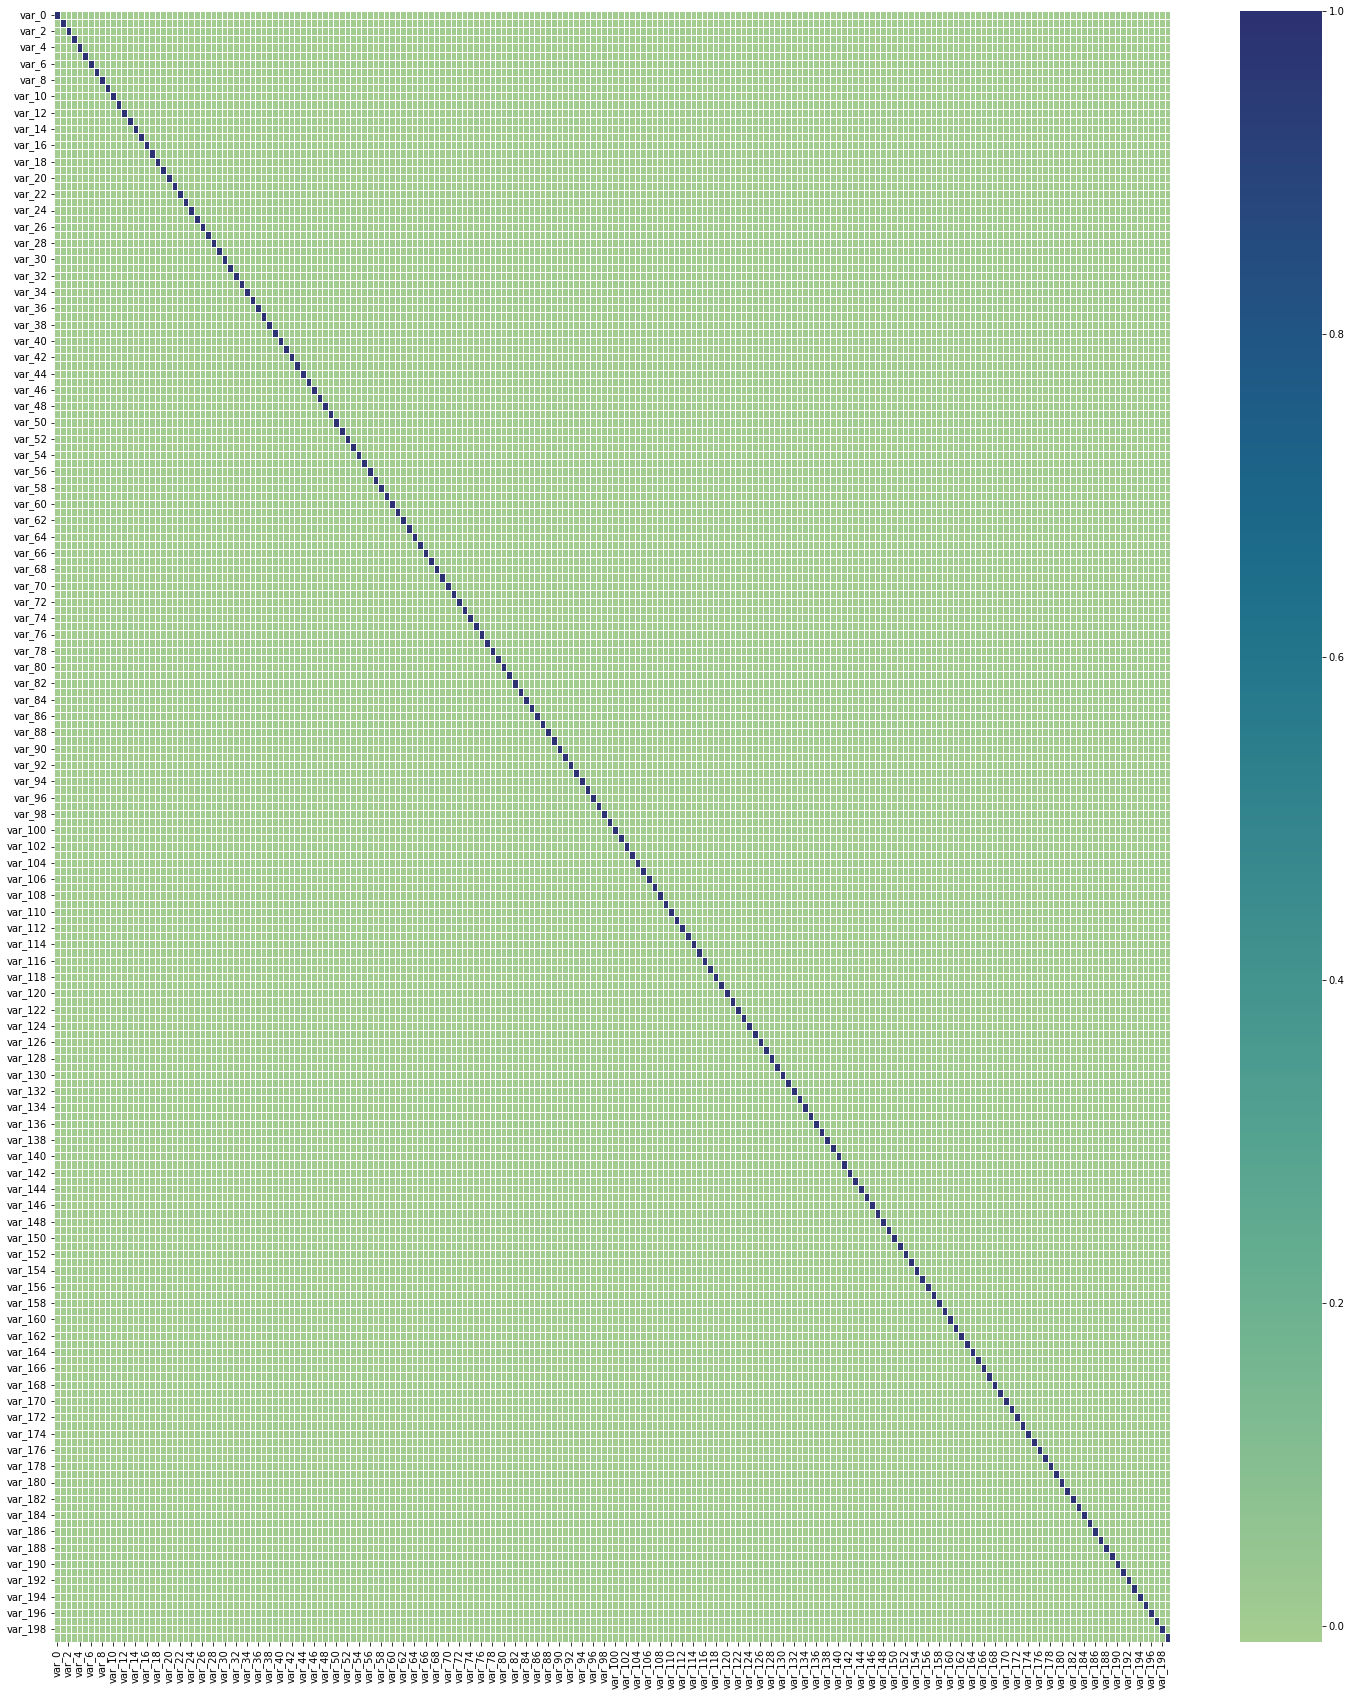

In [101]:
# Assuming df is your DataFrame with 202 columns

# Calculate the correlation matrix
correlation_matrix = df1.drop("target",axis=1).corr()

# Set up the matplotlib figure
plt.figure(figsize=(25,30))

# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix, cmap="crest", annot=False, fmt=".2f", linewidths=0.5)

# Show the plot
plt.show()


There is no highly correlated values founded in the data.

## Spliting the data

In [102]:
X=df1.drop("target",axis=1)
y=df1.target

In [54]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

## Model Creation

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=42)

## Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='liblinear')
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

y_proba = lr.predict_proba(X_test)
y_preda = y_proba[:,1]  #for positive values

### Evaluation metrics for Logistic Regression

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     44880
           1       0.71      0.26      0.38      5120

    accuracy                           0.91     50000
   macro avg       0.81      0.62      0.67     50000
weighted avg       0.90      0.91      0.89     50000

[[44327   553]
 [ 3793  1327]]


Text(0, 0.5, 'True Positive Rate')

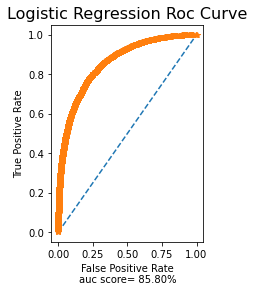

In [58]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,auc,roc_curve,roc_auc_score,f1_score,precision_score,recall_score

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
lr_acc_score= accuracy_score(y_test,y_pred)
lr_precision = precision_score(y_test,y_pred)
lr_recall = recall_score(y_test,y_pred)
lr_f1_score = f1_score(y_test,y_pred)


lr_AUC = roc_auc_score(y_test,y_preda)
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_preda)

 #  plot ROC and AUC
plt.subplot(122)
plt.plot([0,1],[0,1], linestyle='--')
plt.plot(fpr1, tpr1, marker='*')
plt.title("Logistic Regression Roc Curve", fontsize = 16)
plt.xlabel('False Positive Rate\nauc score= {:.2%}'.format(lr_AUC))
plt.ylabel('True Positive Rate')

Insights: Our Logistic egression model accuracy score is 91%. so our XG Boosting model accounts for approximately 91% of the variance.

## Navie Bayes

In [59]:
x=df1.drop("target",axis=1)
y=df1[["target"]]

In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [63]:
from sklearn.naive_bayes import GaussianNB
model1 = GaussianNB()
model1.fit(x_train,y_train)
y_predict = model1.predict(x_test)

y_proba3 = model1.predict_proba(x_test)
y_preda3 = y_proba[:,1] #for positive values

### Evaluation metrics for Navie Bayes

              precision    recall  f1-score   support

           0       0.93      0.98      0.96     44880
           1       0.71      0.36      0.48      5120

    accuracy                           0.92     50000
   macro avg       0.82      0.67      0.72     50000
weighted avg       0.91      0.92      0.91     50000

[[44148   732]
 [ 3295  1825]]


Text(0, 0.5, 'True Positive Rate')

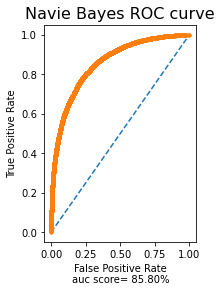

In [64]:
## metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,auc,roc_curve,roc_auc_score,f1_score,precision_score,recall_score

print(classification_report(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
nb_acc_score= accuracy_score(y_test,y_predict)
nb_precision = precision_score(y_test,y_predict)
nb_recall = recall_score(y_test,y_predict)
nb_f1_score = f1_score(y_test,y_predict)


nb_AUC = roc_auc_score(y_test,y_preda3)
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_preda3)

 #  plot ROC and AUC
plt.subplot(122)
plt.plot([0,1],[0,1], linestyle='--')
plt.plot(fpr3, tpr3, marker='.')
plt.title("Navie Bayes ROC curve", fontsize = 16)
plt.xlabel('False Positive Rate\nauc score= {:.2%}'.format(nb_AUC))
plt.ylabel('True Positive Rate')

Insights: Our Navie Bayes model accuracy score is 91%. so our Navie Bayes model accounts for approximately 92% of the variance.

## Decision Tree

In [69]:
from sklearn.tree import DecisionTreeClassifier # import decision algorithm
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_pred=dt.predict(x_test)

dt.probability=True
y_probaa = dt.predict_proba(x_test)
y_predaa = y_proba[:,1] #for positive value

print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91     44880
           1       0.20      0.21      0.20      5120

    accuracy                           0.83     50000
   macro avg       0.55      0.56      0.55     50000
weighted avg       0.84      0.83      0.83     50000



## Apply Hyper Parameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    "criterion":("gini","entropy"),
    "splitter":("best","random"),
    "max_depth":[None,10,20,30,40],
    "min_samples_split":[2,3,10],
    "min_samples_leaf":[1,2,4],
}

tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf,params,scoring='accuracy',cv=3,n_jobs=-1,verbose=2)

tree_cv.fit(x_train,y_train)

In [72]:
best_params = tree_cv.best_params_
print(f"Best_params: {best_params})")

Best_params: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'random'})


In [75]:
from sklearn.tree import DecisionTreeClassifier # import decision algorithm
dt1=DecisionTreeClassifier(criterion ='gini',splitter='random',max_depth=10,min_samples_leaf=2,min_samples_split=5)
dt1.fit(x_train,y_train)
dt1_pred=dt1.predict(x_test)

dt.probability=True
y_proba4 = dt1.predict_proba(x_test)
y_preda4 = y_proba[:,1] #for positive value

print(classification_report(y_test,dt1_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     44880
           1       0.38      0.03      0.06      5120

    accuracy                           0.90     50000
   macro avg       0.64      0.51      0.50     50000
weighted avg       0.85      0.90      0.85     50000



### Evaluation metrics for Decision Tree

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     44880
           1       0.38      0.03      0.06      5120

    accuracy                           0.90     50000
   macro avg       0.64      0.51      0.50     50000
weighted avg       0.85      0.90      0.85     50000

[[44592   288]
 [ 4947   173]]


Text(0, 0.5, 'True Positive Rate')

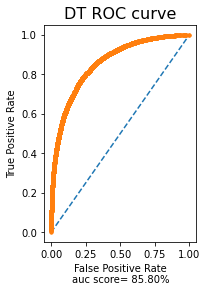

In [103]:
## metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,auc,roc_curve,roc_auc_score,f1_score,precision_score,recall_score

print(classification_report(y_test,dt1_pred))
print(confusion_matrix(y_test,dt1_pred))
dt_acc_score= accuracy_score(y_test,dt1_pred)
dt_precision = precision_score(y_test,dt1_pred)
dt_recall = recall_score(y_test,dt1_pred)
dt_f1_score = f1_score(y_test,dt1_pred)

#dt_cv_score = cross_val_score(dt, X, y, cv=3, scoring = 'accuracy').mean()

dt_AUC = roc_auc_score(y_test,y_preda4)  #AUC
fpr4, tpr4, thresholds4 = roc_curve(y_test, y_preda4) #ROC

 #  plot ROC and AUC
plt.subplot(122)
plt.plot([0,1],[0,1], linestyle='--')
plt.plot(fpr4, tpr4, marker='.')
plt.title("DT ROC curve", fontsize = 16)
plt.xlabel('False Positive Rate\nauc score= {:.2%}'.format(dt_AUC))
plt.ylabel('True Positive Rate')

Insights:
     Our DecisionTree Classifier  model had an initial  score of 83% before hyperparameter tuning.
After tuning, the model's score is 90%, signifying that the tuned DecisionTree model explains approximately 90% of the variance, marking a substantial improvement in predictive performance compared to the original model.

## XG Boost

In [78]:
!pip install xgboost

  Using cached numpy-1.22.4-cp39-cp39-win_amd64.whl (14.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.2
    Uninstalling numpy-1.26.2:
      Successfully uninstalled numpy-1.26.2


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\SIVA KUMAR\\anaconda3\\Lib\\site-packages\\~~mpy.libs\\libopenblas64__v0.3.23-293-gc2f4bdbb-gcc_10_3_0-2bde3a66a51006b2b53eb373ff767a3f.dll'
Consider using the `--user` option or check the permissions.



In [79]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
y_pred7 = xgb.predict(x_test)

xgb.probability = True
y_proba7 = xgb.predict_proba(x_test)
y_preda7 = y_proba7[:,1] #for positive values

### Evaluation metrics for XG boost

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     44880
           1       0.71      0.24      0.36      5120

    accuracy                           0.91     50000
   macro avg       0.81      0.61      0.66     50000
weighted avg       0.90      0.91      0.89     50000

[[44373   507]
 [ 3894  1226]]


Text(0, 0.5, 'True Positive Rate')

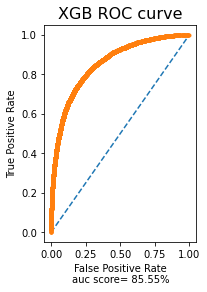

In [80]:
## metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,auc,roc_curve,roc_auc_score,f1_score,precision_score,recall_score
from sklearn.model_selection import cross_val_score
print(classification_report(y_test,y_pred7))
print(confusion_matrix(y_test,y_pred7))
xgb_acc_score= accuracy_score(y_test,y_pred7)
xgb_precision = precision_score(y_test,y_pred7)
xgb_recall = recall_score(y_test,y_pred7)
xgb_f1_score = f1_score(y_test,y_pred7)

#xgb_cv_score = cross_val_score(xgb, X, y, cv=3, scoring = 'accuracy').mean()

xgb_AUC = roc_auc_score(y_test,y_preda7)  #AUC
fpr7, tpr7, thresholds7 = roc_curve(y_test, y_preda7) #ROC

 #  plot ROC and AUC
plt.subplot(122)
plt.plot([0,1],[0,1], linestyle='--')
plt.plot(fpr7, tpr7, marker='.')
plt.title("XGB ROC curve", fontsize = 16)
plt.xlabel('False Positive Rate\nauc score= {:.2%}'.format(xgb_AUC))
plt.ylabel('True Positive Rate')

Insights: Our XG Boosting model accuracy score is 91%. so our XG Boosting model accounts for approximately 91% of the variance.

## Random Forest

In [82]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred5 = rf.predict(x_test)

y_proba5 = rf.predict_proba(x_test)
y_preda5 = y_proba[:,1] #for positive values

print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     44880
           1       0.00      0.00      0.00      5120

    accuracy                           0.90     50000
   macro avg       0.45      0.50      0.47     50000
weighted avg       0.81      0.90      0.85     50000



### Evaluation Metrics for RF

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     44880
           1       0.00      0.00      0.00      5120

    accuracy                           0.90     50000
   macro avg       0.45      0.50      0.47     50000
weighted avg       0.81      0.90      0.85     50000

[[44880     0]
 [ 5120     0]]


Text(0, 0.5, 'True Positive Rate')

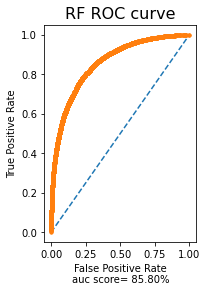

In [83]:
## metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,auc,roc_curve,roc_auc_score,f1_score,precision_score,recall_score

print(classification_report(y_test,y_pred5))
print(confusion_matrix(y_test,y_pred5))
rf_acc_score= accuracy_score(y_test,y_pred5)
rf_precision = precision_score(y_test,y_pred5)
rf_recall = recall_score(y_test,y_pred5)
rf_f1_score = f1_score(y_test,y_pred5)


rf_AUC = roc_auc_score(y_test,y_preda5)  #AUC
fpr5, tpr5, threshold5 = roc_curve(y_test, y_preda5) #ROC

 #  plot ROC and AUC
plt.subplot(122)
plt.plot([0,1],[0,1], linestyle='--')
plt.plot(fpr5, tpr5, marker='.')
plt.title("RF ROC curve", fontsize = 16)
plt.xlabel('False Positive Rate\nauc score= {:.2%}'.format(rf_AUC))
plt.ylabel('True Positive Rate')

Insights: Our Random Forest model accuracy score is 90%. so our Random Forest accounts for approximately 90% of the variance.

## Gradient Boosting

In [84]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier()
gbm.fit(x_train,y_train)
y_pred6 = gbm.predict(x_test)
 
gbm.probability = True
y_proba6 = gbm.predict_proba(x_test)
y_preda6 = y_proba[:,1] #for positive values

### Evaluation Metrics for GB

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     44880
           1       0.83      0.03      0.06      5120

    accuracy                           0.90     50000
   macro avg       0.87      0.52      0.51     50000
weighted avg       0.89      0.90      0.86     50000

[[44845    35]
 [ 4948   172]]


Text(0, 0.5, 'True Positive Rate')

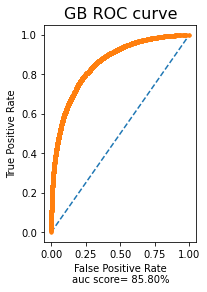

In [85]:
## metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,auc,roc_curve,roc_auc_score,f1_score,precision_score,recall_score

print(classification_report(y_test,y_pred6))
print(confusion_matrix(y_test,y_pred6))
gb_acc_score= accuracy_score(y_test,y_pred6)
gb_precision = precision_score(y_test,y_pred6)
gb_recall = recall_score(y_test,y_pred6)
gb_f1_score = f1_score(y_test,y_pred6)


gb_AUC = roc_auc_score(y_test,y_preda6)  #AUC
fpr6, tpr6, thresholds6 = roc_curve(y_test, y_preda6) #ROC

 #  plot ROC and AUC
plt.subplot(122)
plt.plot([0,1],[0,1], linestyle='--')
plt.plot(fpr6, tpr6, marker='.')
plt.title("GB ROC curve", fontsize = 16)
plt.xlabel('False Positive Rate\nauc score= {:.2%}'.format(gb_AUC))
plt.ylabel('True Positive Rate')

Insights: Our Gradient Boosting model accuracy score is 90%. so our Gradient Boosting model accounts for approximately 90% of the variance.

### NOTE: During Doubt Clearing session we have been advised with Hyperparametric tunning is enough for single Algorithm because the dataset has more number of Rows and columns as it may corrupt the data. So we have done hyperparametric tunning for only one Algorithm.

## Final Report

In [89]:
# # Final Report:
acc_scores=[lr_acc_score,nb_acc_score, dt_acc_score, rf_acc_score, gb_acc_score, xgb_acc_score]
precision_scores=[lr_precision,nb_precision, dt_precision, rf_precision, gb_precision, xgb_precision]
recall_scores=[lr_recall,nb_recall, dt_recall, rf_recall,gb_recall, xgb_recall]
f1_scores=[lr_f1_score,nb_f1_score,dt_f1_score, rf_f1_score, gb_f1_score, xgb_f1_score]
AUC_scores=[lr_AUC,nb_AUC,dt_AUC, rf_AUC, gb_AUC, xgb_AUC]


algorithms=['Logistic Regression','Navie Bayes','DecisionTree','RandomForest','GradientBoosting','XGBoosting']
for i in range(len(algorithms)):
    print("The Accuray Score acheived using " + algorithms[i] + ' is: ' + str((acc_scores[i])*100)+"%")

The Accuray Score acheived using Logistic Regression is: 91.308%
The Accuray Score acheived using Navie Bayes is: 91.94600000000001%
The Accuray Score acheived using DecisionTree is: 89.53%
The Accuray Score acheived using RandomForest is: 89.75999999999999%
The Accuray Score acheived using GradientBoosting is: 90.034%
The Accuray Score acheived using XGBoosting is: 91.19800000000001%


## Plotting Accuracy_Scores Vs Models
#### Accuracy Score function computes accuracy of a classifier is calculated as the ratio of the total number of correctly predicted samples by the total number of samples.

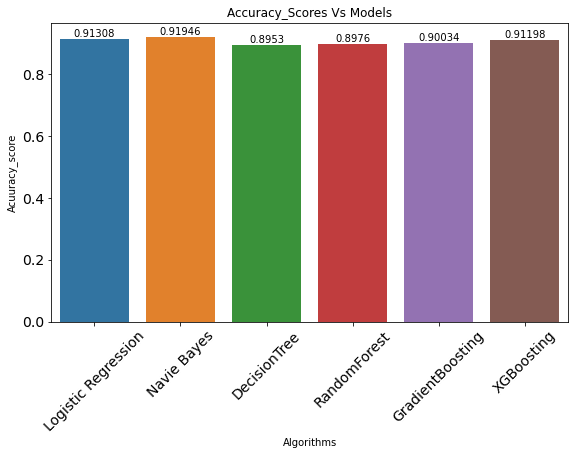

In [90]:
# plotting the barplot between algoriths and their accuracy_scores
plt.figure(figsize=(8,6))
plt.xlabel("Algorithms")
plt.ylabel("Acuuracy_score")
plt.title("Accuracy_Scores Vs Models")
ax=sns.barplot(x=algorithms,y=acc_scores)
for label in ax.containers:
    ax.bar_label(label)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.tick_params(labelsize=14)

By above barplot shows accuracy_scores of different models in that Logistic Regression,XG Boost,Navie Bayes,Gradient Boosting gave the best scores.

## Precision_scores Vs Models
#### Precision Score is the fraction of predicted positives events that are actually positive and is a measure of the accuracy

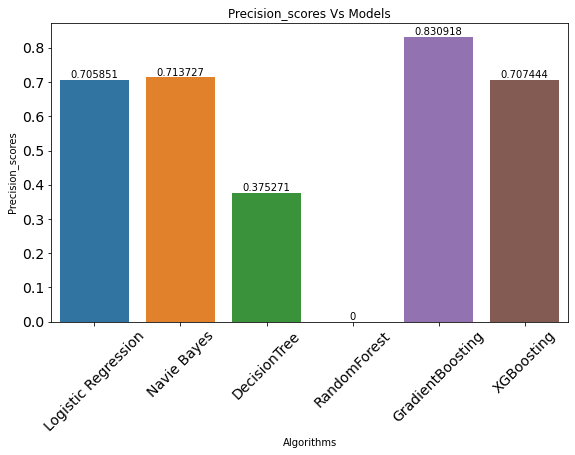

In [91]:
plt.figure(figsize=(8,6))
plt.xlabel("Algorithms")
plt.ylabel("Precision_scores")
plt.title("Precision_scores Vs Models")
ax=sns.barplot(x=algorithms,y=precision_scores)
for label in ax.containers:
    ax.bar_label(label)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.tick_params(labelsize=14)

By above barplot shows Precision_Scores of different models in that Gradient Boosting,Navie Bayes,XG Boost,Logistic Regression gave the best scores.

## Recall_scores Vs Models
#### Recall (or sensitivity) Score is the fraction of positives events that were predicted correctly, or the true positive rate

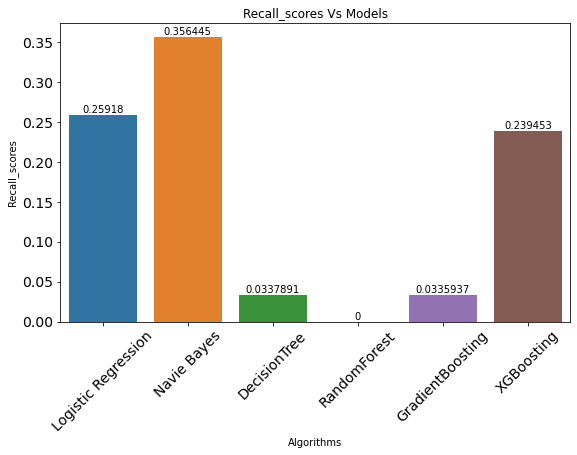

In [92]:
plt.figure(figsize=(8,6))
plt.xlabel("Algorithms")
plt.ylabel("Recall_scores")
plt.title("Recall_scores Vs Models")
ax=sns.barplot(x=algorithms,y=recall_scores)
for label in ax.containers:
    ax.bar_label(label)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.tick_params(labelsize=14)

By above barplot shows recall_scores of different models in that Navie Bayes,Logistic Regression,XG boost gave the best scores.

## F1_scores Vs Models
#### F1-Score is the weighted average of Precision and Recall & F1-Score of 1 is the best, with perfect precision and recall.

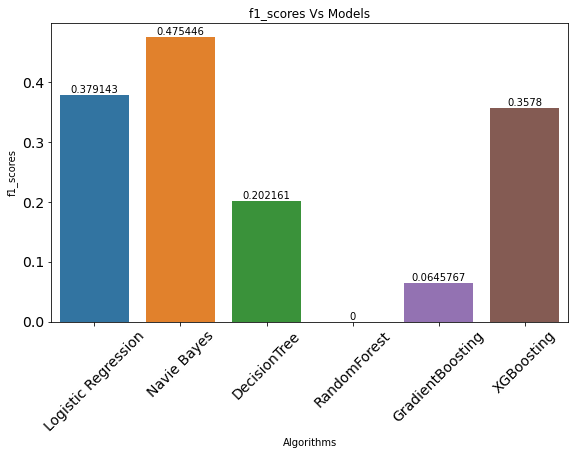

In [93]:
plt.figure(figsize=(8,6))
plt.xlabel("Algorithms")
plt.ylabel("f1_scores")
plt.title("f1_scores Vs Models")
ax=sns.barplot(x=algorithms,y=f1_scores)
for label in ax.containers:
    ax.bar_label(label)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.tick_params(labelsize=14)

By above barplot shows f1_scores of different models in that Navie Bayes,Logistic Regression,XG Boost has best values.

## AUC Score Vs Models
#### Area Under the Curve (AUC) Score is the area under the ROC curve. The greater the area under the curve, the more accurate the test.

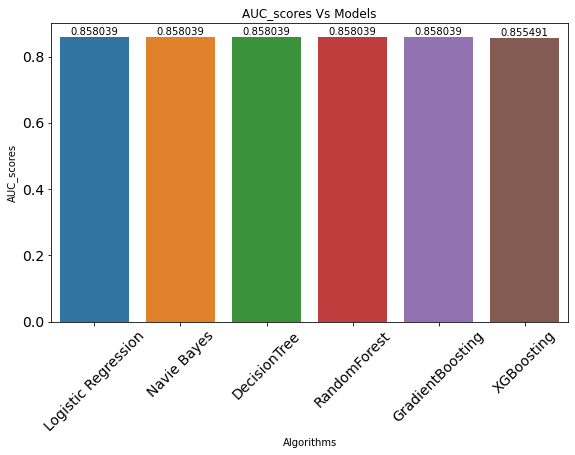

In [94]:
plt.figure(figsize=(8,6))
plt.xlabel("Algorithms")
plt.ylabel("AUC_scores")
plt.title("AUC_scores Vs Models")
ax=sns.barplot(x=algorithms,y=AUC_scores)
for label in ax.containers:
    ax.bar_label(label)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.tick_params(labelsize=14)

By above barplot shows auc_scores of different models all gives similar auc
scores.

### Challenges Faced

Data Quality and Preprocessing:

 Inaccurate or incomplete data is a common challenge. Cleaning and preprocessing the data involves handling missing
 values, outliers, and ensuring consistency in data formats.
 
Feature Engineering:

 Creating meaningful features from the raw data can be challenging. Feature selection and extraction techniques
are often used to improve model performance.

Large data:

 This data has large number of data points so it is very hard to fit the data in the Machine Learning Models and for Hyperparametric tunning every model takes more than 3 days to give the parameteres and also in between the Working page gets corrupted.

## Summary:

   After trying various models,Navie Byaes model,XG boost model & Logistic Regression model achieved an Accuracy Score score of more than 90%, indicating that Navie Bayes Model, it is the superior model.By trying various performance metrics tried on different models,we were finded that Navie Bayes Model is the best model ,next to that XG Boost is also best model.

## Conclusion:
   Summarize by stating that your Navie Bayes model, with an 92% Accuracy Score, is a promising solution for your problem. It outperforms other models you've tried and provides valuable insights into the relationship between your features and target variable. However, remember to use this model responsibly and consider its interpretability and practicality in real-world applications.

## Challenges Faced:

 1) Data Quality and Preprocessing:
                              Inaccurate or incomplete data is a common challenge. Cleaning and preprocessing the data involves handling missing values, outliers, and ensuring consistency in data formats.
 
 2) Feature Engineering:
                 Creating meaningful features from the raw data can be challenging. Feature selection and extraction techniques
are often used to improve model performance.

 3) Large data:
           This data has large number of data points so it is very hard to fit the data in the Machine Learning Models and for    Hyperparametric tunning every model takes more than 3 days to give the parameteres and also in between the Working page gets corrupted.
           
 3)Correlation:
            After checking multicollinearity by using heatmap there is no collinearity between the features.
                   
## Techniques used for Customer Transction Prediction: 
  
  1)Model Selection:
         Choosing the right machine learning algorithm or ensemble of algorithms can be challenging. Common choices
for Classification tasks like Customer Transaction Prediction include XGBoost, Random Forest,SVM,Decision Tree,Navie Bayes and Logistic Regression etc.
  
   2)Hyperparameter Tuning:
            Hyperparameter tuning using techniques like grid search or random search helps optimize model parameters
 to achieve the best performance, but the data is very large it takes huge time execute tha code even it was 2-3 days.
   
   3)Ensemble Techniques:
               Ensemble methods such as stacking or blending multiple models (e.g., XGBoost, Random Forest and
 Gradient Boost) can improve predictive accuracy.
   
   4)Performance Metrics:
                     The performance metrics for this project was accuracy_score, precision_score, recall_score, f1_score,Roc Curve, AUC_score, Confusion_matrix, and Classification_report. We had prepared camparison plots with the models for knowing that model performance.

## Conclusion:
   With an 92% model accuracy score, it appears that your model has performed well in predicting the Customer Transaction prediction. However,it's essential to validate the model's performance rigorously and consider potential challenges and limitations,such as generalization to unseen data and model interpretability, before deploying it in real-world applications.